In [254]:
!pip install --user matplotlib




[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Mazen Mohamed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [255]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

# Input your image
I'm using an online example. You should import the different test cases provided.

In [256]:
img = cv2.imread('05-Ya3amSheel2elCoinYa3am.jpg')

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

else:
    print("unable to read")

In [257]:
# Switch between the following two samples if you want to see different examples
# req = urllib.request.urlopen('https://th.bing.com/th/id/OIP.7DVS2NnborRqWtxdJVK2GAHaJ4?w=3024&h=4032&rs=1&pid=ImgDetMain')

#https://aishack.in/static/img/tut/sudoku-original.jpg
#https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg
#https://th.bing.com/th/id/OIP.jBUdypHLT_QgxqIb-ZYzNwHaFj?w=2304&h=1728&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.R2FXM2QBD9FssNJGftJ2LwHaJ4?w=864&h=1152&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.Altpl_JzS-TN8bAcpQYtSwAAAA?pid=ImgDet&w=186&h=329&c=7&dpr=1.3
#https://www.asianscientist.com/wp-content/uploads/bfi_thumb/Sudoku-Saves-Photographers-From-Copyright-Theft-2v598pitnw2vs3a6bz0yyo.jpg


# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv2.imdecode(arr, -1) # 'Load it as it is'
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

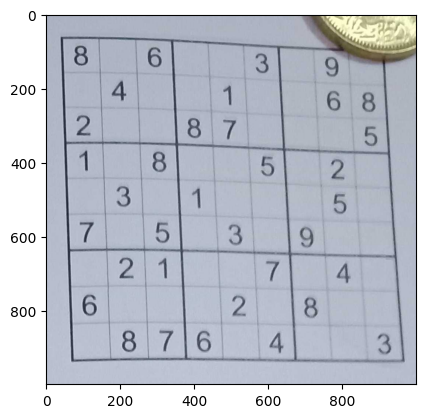

In [258]:
plt.imshow(img_rgb);

# Convert to grayscale
We don't need any color information.

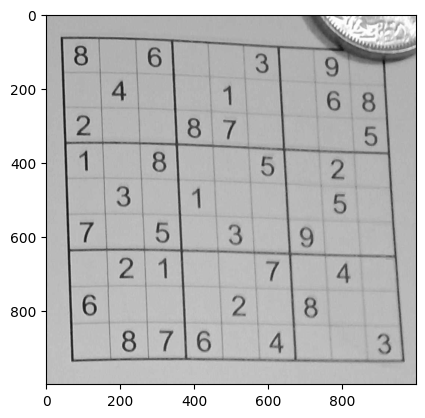

In [259]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

In [260]:
img_gray_equalized = cv2.equalizeHist(img_gray)
img_gray_blurred = cv2.GaussianBlur(img_gray_equalized, (3, 3), 0) 


# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!


### Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

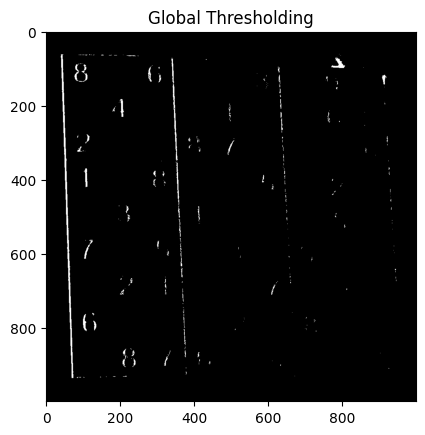

In [261]:
_, img_gray_global_threshed = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding')

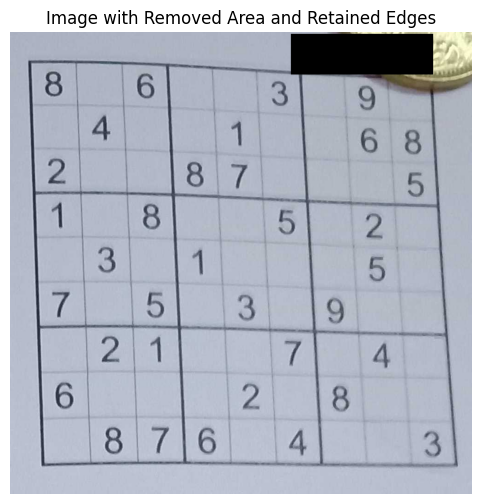

In [262]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
image = cv2.imread('05-Ya3amSheel2elCoinYa3am.jpg')

# Get image dimensions
image_height, image_width, _ = image.shape

# Coordinates of the area to process
top_left = (608, 4)
bottom_right = (916, 92)

# Validate and adjust coordinates to ensure they're within image bounds
top_left = (min(image_width, top_left[0]), min(image_height, top_left[1]))
bottom_right = (min(image_width, bottom_right[0]), min(image_height, bottom_right[1]))

# Ensure coordinates are within image bounds after adjustment
if (top_left[0] < bottom_right[0]) and (top_left[1] < bottom_right[1]):
    # Create a mask to exclude the specified region
    mask = np.zeros_like(image)
    mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 255

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Apply bitwise AND operation to the original image and the inverted mask
    result = cv2.bitwise_and(image, mask_inv)

    # Apply bitwise AND operation with the original image to retain the edges
    final_result = cv2.bitwise_and(image, result)

    # Display the final image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
    plt.title('Image with Removed Area and Retained Edges')
    plt.axis('off')
    plt.show()

else:
    print("Adjusted coordinates are invalid or outside image bounds")

img_rgb = cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB)
img_try=cv2.cvtColor(final_result,cv2.COLOR_RGB2GRAY)


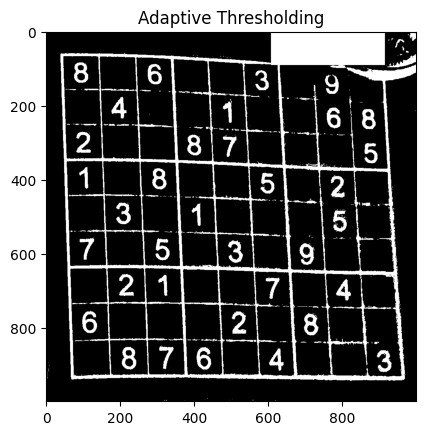

In [263]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_try,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=5
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

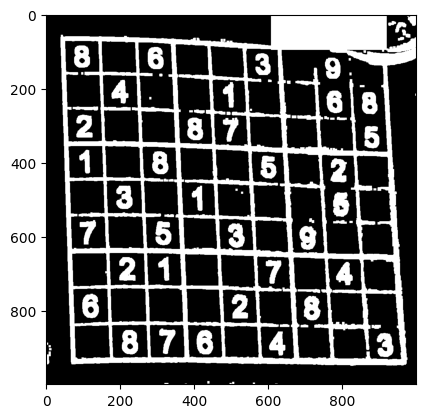

In [264]:
####################ADDED just trying some morphological methods################
kernel1 =np.ones((2,2),np.uint8)
dilation=cv2.dilate(img_gray_threshed,kernel1,iterations=5)
erosion=cv2.erode(dilation,kernel1,iterations=1)
closing =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1,iterations=1)
opeining =cv2.morphologyEx(dilation,cv2.MORPH_OPEN,kernel1,iterations=1)
erosion=cv2.erode(opeining,kernel1,iterations=2)
plt.imshow(dilation,cmap="gray")

# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

### Enhancement : One way is getting the biggest contour in the image 

In [274]:
####################ADDED################
def biggestContour (contours):
    biggest=np.array([])
    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area> 100:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew
    
    

### Outer frame corners identification

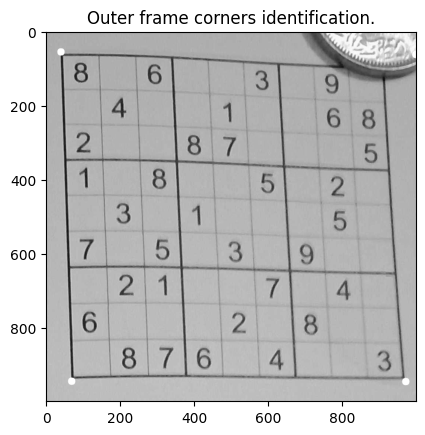

In [275]:
####################ADDED################
heightImg=600
widthImg=600
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(dilation,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(255,50,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(255,0,0),20)
    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()
    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.') 
plt.imshow(imgBigContour,cmap="gray")

## Image warpping (Outer frame isolation)

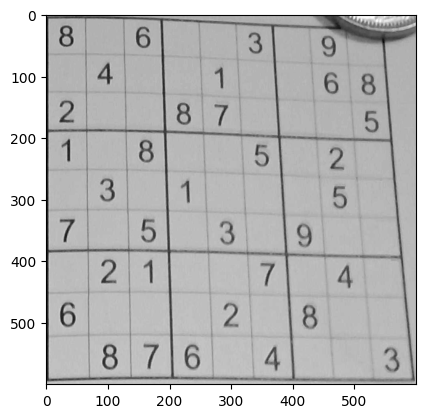

In [276]:
####################ADDED################
plt.imshow(imgWrapedgrey,cmap="gray")

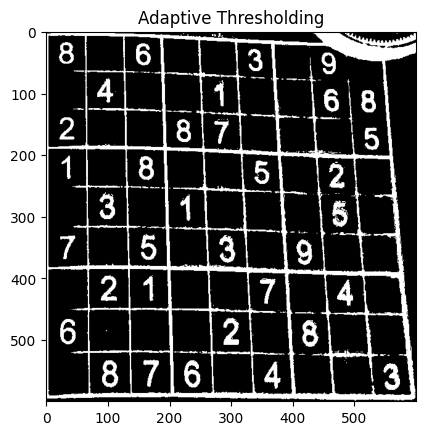

In [277]:
####################ADDED################

img_gray_threshed = cv2.adaptiveThreshold(src=imgWrapedgrey,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=99,
    C=3
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

# Separate the number tiles
Finally, you get each value in a tile of its own, ready to go to phase 2 (OCR).

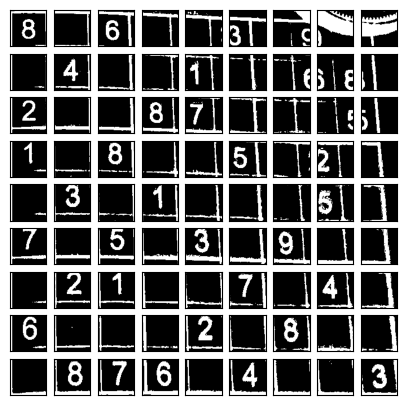

In [278]:
#CHANGED img_gray_threshed_warped to img_gray_threshed

M = img_gray_threshed.shape[0] // 9
N = img_gray_threshed.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

In [7]:
import cv2
import numpy as np
import itertools
from skimage.transform import hough_line, hough_line_peaks

def preprocess_image(image_path, shred_width):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate number of shreds
    num_shreds = image.shape[1] // shred_width
    
    # Extract shreds
    shreds = [image[:, i*shred_width:(i+1)*shred_width] for i in range(num_shreds)]
    
    return shreds

def compute_hough_lines(image):
    h, theta, d = hough_line(image)
    _, angles, dists = hough_line_peaks(h, theta, d)
    max_length = 0
    for angle, dist in zip(angles, dists):
        x0 = dist * np.cos(angle)
        y0 = dist * np.sin(angle)
        x1 = int(x0 + 1000 * (-np.sin(angle)))
        y1 = int(y0 + 1000 * (np.cos(angle)))
        x2 = int(x0 - 1000 * (-np.sin(angle)))
        y2 = int(y0 - 1000 * (np.cos(angle)))
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        max_length = max(max_length, length)
    return max_length

def find_optimal_permutation(shreds):
    max_hough_length = 0
    optimal_permutation = None
    for perm in itertools.permutations(range(len(shreds))):
        assembled_image = np.concatenate([shreds[i] for i in perm], axis=1)
        hough_length = compute_hough_lines(assembled_image)
        if hough_length > max_hough_length:
            max_hough_length = hough_length
            optimal_permutation = perm
    return optimal_permutation

# Image path
image_path = 'shredded.jpg'
# Width of each shred
shred_width = 64

# Preprocess image into shreds
shreds = preprocess_image(image_path, shred_width)

# Find optimal permutation
optimal_permutation = find_optimal_permutation(shreds)
print("Optimal permutation:", optimal_permutation)


KeyboardInterrupt: 